In [1]:
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#使用資料夾內Michael Jordan的資料集，練習邏輯迴歸的處理邏輯
train = pd.read_csv('data/michael_jordan.csv')
train.head(10)

#Year:年度
#Pos:位置 ~ SF:Small Forward ; SG:Shooting guard 
#Age:年紀
#Tm:隊伍
#MP:Minutes Played 出場時間
#FT:Free Throws 罰球
#TRB:Total Rebounds 籃板 
#AST:Assists 助攻 
#STL:Steals 抄截 
#BLK:Blocked shots 阻攻 
#TOV:Turnover 失誤 
#PF:Personal foul 犯規 
#PTS:Points 得分 

,Year,Pos,Age,Tm,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003,SF,39,WAS,3031,266,497,311,123,39,173,171,1640
1,2002,SF,38,WAS,2093,263,339,310,85,26,162,119,1375
2,2001,0,37,0,0,0,0,0,0,0,0,0,0
3,2000,0,36,0,0,0,0,0,0,0,0,0,0
4,1999,0,35,0,0,0,0,0,0,0,0,0,0
5,1998,SG,34,CHI,3181,565,475,283,141,45,185,151,2357
6,1997,SG,33,CHI,3106,480,482,352,140,44,166,156,2431
7,1996,SG,32,CHI,3090,548,543,352,180,42,197,195,2491
8,1995,SG,31,CHI,668,109,117,90,30,13,35,47,457
9,1994,0,30,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

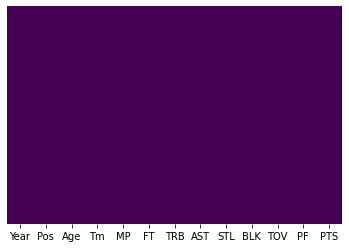

In [3]:
#探索資料
#用heatmap(.isnull()來找出缺失的資料在哪些欄位。)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#並無缺少的資料。

<AxesSubplot:xlabel='Age', ylabel='PTS'>

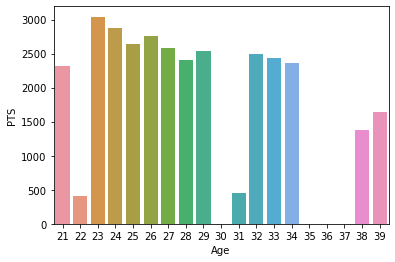

In [24]:
#用barplot來看AGE是否影響PTS。
sns.barplot(x='Age',y='PTS',data=train)

<AxesSubplot:xlabel='Age', ylabel='MP'>

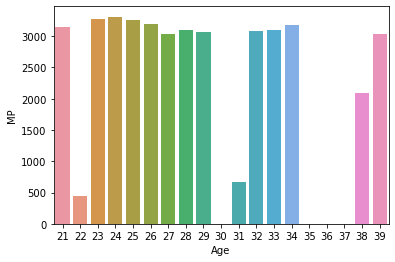

In [23]:
#Age是否也影響MP出場時間?
sns.barplot(x='Age',y='MP',data=train)

<AxesSubplot:xlabel='Age', ylabel='TOV'>

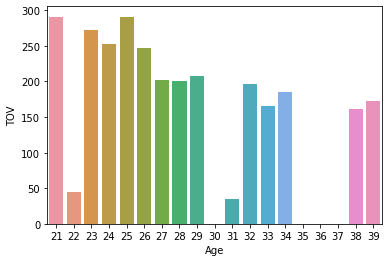

In [27]:
#Age是否也影響TOV失誤?
sns.barplot(x='Age',y='TOV',data=train)

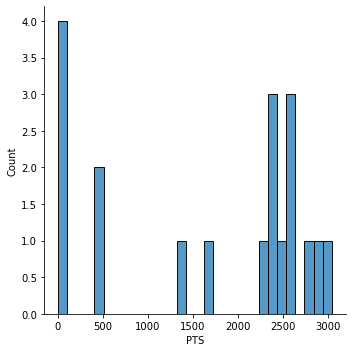

In [26]:
#用直方圖看PTS得分分佈。
sns.displot(train['PTS'].dropna(),kde=False,bins=30)

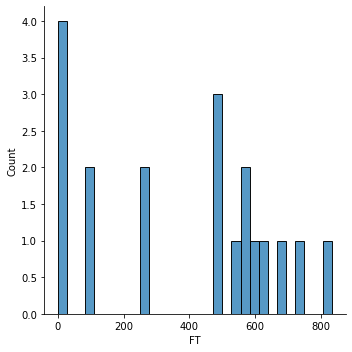

In [7]:
#用直方圖看FT分佈。
sns.displot(train['FT'].dropna(),kde=False,bins=30)

<AxesSubplot:>

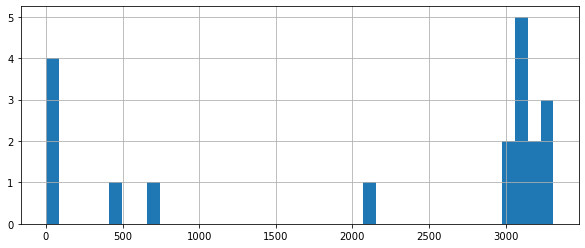

In [8]:
#用直方圖看MP出場時間分佈
train['MP'].hist(bins=40,figsize=(10,4))

In [9]:
train.dropna(inplace=True) #inplace： False: 返回新的數據集（默認） True: 在原數據集上操作

In [10]:
#虛擬變數範例
#使用pandas(d.get_dummies)將Tm隊伍從類別資料轉為數值變數。
Tm = pd.get_dummies(train['Tm'],drop_first=True)
#請將drop_first=True，如果為True會刪除第一個類別值。
#本來若有k個level，drop_first=True會只剩下k-1個level，降低共線性的可能
Tm.head()

,CHI,WAS
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [11]:
#使用pandas將Pos位置從類別資料改換為數值變數(drop_first=True)
Pos = pd.get_dummies(train['Pos'],drop_first=True)
Pos.head()

,SF,SG
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [12]:
#將Tm隊伍與Pos位置的數值變數和原始的data結合
train = pd.concat([train,Tm,Pos],axis=1)
train.head()

,Year,Pos,Age,Tm,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS,CHI,WAS,SF,SG
0,2003,SF,39,WAS,3031,266,497,311,123,39,173,171,1640,0,1,1,0
1,2002,SF,38,WAS,2093,263,339,310,85,26,162,119,1375,0,1,1,0
2,2001,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1999,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
#將原始的Tm隊伍與Pos位置欄位棄用
train.drop(['Pos','Tm'],axis=1,inplace=True)
train.head()

,Year,Age,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS,CHI,WAS,SF,SG
0,2003,39,3031,266,497,311,123,39,173,171,1640,0,1,1,0
1,2002,38,2093,263,339,310,85,26,162,119,1375,0,1,1,0
2,2001,37,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000,36,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1999,35,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#建立feature資料集(選取CHI以外所有欄位)與target資料集(CHI)
X = train.drop('CHI',axis=1)
y = train['CHI']

In [15]:
#載入訓練組及測試組分組套件
from sklearn.model_selection import train_test_split

In [37]:
#設定隨機種子(random_state)為101，測試組比例佔30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [38]:
#載入邏輯回歸
from sklearn.linear_model import LogisticRegression

In [39]:
#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [40]:
#使用模型進行測試集資料的預測
predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X_train)

In [41]:
#ground truth
print(y_test.values)
print(y_train.values)

[0 1 0 0 0 1]
[1 1 1 0 1 0 1 1 1 1 1 1 1]


計算accuracy及結果顯示
accuracy
error_index #錯誤答案是哪幾筆資料
miss classification #錯誤答案
錯誤欄位的正確之原始資料表格

In [42]:
error_index2=np.where(predictions2!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(predictions!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))

#test accuracy 66.7%，可能因為樣本數太少，如MJ多打幾年，應該會更準確。

train accuracy: 1.0
test accuracy: 0.6666666666666667


In [43]:
print('error_index:',error_index)
print('miss classification :',predictions[error_index])  #錯誤答案
data_index=train.iloc[error_index].index  #這裡變數train是所有資料
train.iloc[data_index]  #錯誤欄位的正確之原始資料

error_index: [2 4]
miss classification : [1 1]


,Year,Age,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS,CHI,WAS,SF,SG
2,2001,37,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1999,35,0,0,0,0,0,0,0,0,0,0,0,0,0


改用設定隨機種子(random_state)為200，測試組比例佔30%進行分析

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=200)

In [45]:
#載入邏輯回歸
from sklearn.linear_model import LogisticRegression

In [46]:
#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [47]:
#使用模型進行測試集資料的預測
predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X_train)

In [48]:
#ground truth
print(y_test.values)
print(y_train.values)

[1 1 1 1 0 0]
[0 0 1 1 1 1 1 1 1 1 0 1 0]


In [49]:
error_index2=np.where(predictions2!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(predictions!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))

train accuracy: 1.0
test accuracy: 0.6666666666666667


In [50]:
print('error_index:',error_index)
print('miss classification :',predictions[error_index])  #錯誤答案
data_index=train.iloc[error_index].index  #這裡變數train是所有資料
train.iloc[data_index]  #錯誤欄位的正確之原始資料

error_index: [0 3]
miss classification : [0 0]


,Year,Age,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS,CHI,WAS,SF,SG
0,2003,39,3031,266,497,311,123,39,173,171,1640,0,1,1,0
3,2000,36,0,0,0,0,0,0,0,0,0,0,0,0,0


改用設定隨機種子(random_state)為200，測試組比例佔20%進行分析

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=200)

In [52]:
#載入邏輯回歸
from sklearn.linear_model import LogisticRegression

In [53]:
#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [54]:
#使用模型進行測試集資料的預測
predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X_train)

In [55]:
#ground truth
print(y_test.values)
print(y_train.values)

[1 1 1 1]
[0 0 0 0 1 1 1 1 1 1 1 1 0 1 0]


In [56]:
error_index2=np.where(predictions2!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(predictions!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))

train accuracy: 1.0
test accuracy: 0.5


In [57]:
print('error_index:',error_index)
print('miss classification :',predictions[error_index])  #錯誤答案
data_index=train.iloc[error_index].index  #這裡變數train是所有資料
train.iloc[data_index]  #錯誤欄位的正確之原始資料

error_index: [0 3]
miss classification : [0 0]


,Year,Age,MP,FT,TRB,AST,STL,BLK,TOV,PF,PTS,CHI,WAS,SF,SG
0,2003,39,3031,266,497,311,123,39,173,171,1640,0,1,1,0
3,2000,36,0,0,0,0,0,0,0,0,0,0,0,0,0
